In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline #it show plot inside notebook
import matplotlib #it is used for global plot setting 
matplotlib.rcParams['figure.figsize']=(20,10) #set defalt figsize


UsageError: unrecognized arguments: #it show plot inside notebook


In [4]:
df=pd.read_csv('Bengaluru_House_Data.csv')
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [5]:
df.groupby('area_type')['area_type'].aggregate('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [6]:
df1=df.drop(['area_type','availability','society','balcony'],axis='columns')
df1

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00
...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,231.00
13316,Richards Town,4 BHK,3600,5.0,400.00
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00
13318,Padmanabhanagar,4 BHK,4689,4.0,488.00


In [7]:
df1.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [8]:
df2=df1.dropna()
df2.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [9]:
df2['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [10]:
df2['Bhk']=df2['size'].apply(lambda x: int(x.split(' ')[0]))

C:\Users\Admin\AppData\Local\Temp\ipykernel_15064\2704324914.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Bhk']=df2['size'].apply(lambda x: int(x.split(' ')[0]))


**in above we convert size column to as bhk column**

In [11]:
df2

,location,size,total_sqft,bath,price,Bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2
...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,231.00,5
13316,Richards Town,4 BHK,3600,5.0,400.00,4
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00,2
13318,Padmanabhanagar,4 BHK,4689,4.0,488.00,4


In [12]:
df2['Bhk'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18])

In [13]:
df2['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      shape=(2067,), dtype=object)

In [14]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True


**in above we create function for check float value if value is not float then its throw exception**

In [15]:
df2

,location,size,total_sqft,bath,price,Bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2
...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,231.00,5
13316,Richards Town,4 BHK,3600,5.0,400.00,4
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00,2
13318,Padmanabhanagar,4 BHK,4689,4.0,488.00,4


In [16]:
df2[~df2['total_sqft'].apply(is_float)].head(10)

,location,size,total_sqft,bath,price,Bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


**in above we checked non float value and using ~ we show only non floating value**

In [17]:
def convert_sqrft_to_avg(x):
    x=str(x)
    tokens=x.split('-')
    if len(tokens)==2:
        return(float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None
    

**above function is create for calculate avrage of range total-sqr column where two values is present**

In [18]:
convert_sqrft_to_avg('4689')

4689.0

In [19]:
df3=df2.copy()

In [20]:
df3['total_sqft']=df3['total_sqft'].apply(convert_sqrft_to_avg)
df3

,location,size,total_sqft,bath,price,Bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2
...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453.0,4.0,231.00,5
13316,Richards Town,4 BHK,3600.0,5.0,400.00,4
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2
13318,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4


In [21]:
df3[df3['total_sqft'].apply(is_float)]

,location,size,total_sqft,bath,price,Bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2
...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453.0,4.0,231.00,5
13316,Richards Town,4 BHK,3600.0,5.0,400.00,4
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2
13318,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4


In [22]:
df3[(df3['location']=='Kengeri')&(df3['price']==18.5)]

,location,size,total_sqft,bath,price,Bhk
410,Kengeri,1 BHK,NaN,1.0,18.5,1


In [23]:
df2.iloc[410]

location      Kanakpura Road
size                   3 BHK
total_sqft              1550
bath                     3.0
price                   64.5
Bhk                        3
Name: 414, dtype: object

In [24]:
df4=df3.copy()

In [25]:
df4['price_per_sqr']=df4['price']*100000/df4['total_sqft']
df4.head()

,location,size,total_sqft,bath,price,Bhk,price_per_sqr
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


**create new column for price per sqaure fit**


**now we check for category feature that is location in that we check how much unique data is preset**

In [26]:
len(df4['location'].unique())

1304

**in this multiple locations is present we have to minimise some data**

In [27]:
df4.location=df4.location.apply(lambda x: x.strip())

In [28]:
location_stat=df4.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stat

location
Whitefield                   535
Sarjapur  Road               392
Electronic City              304
Kanakpura Road               266
Thanisandra                  236
                            ... 
adigondanhalli                 1
akshaya nagar t c palya        1
anjananager magdi road         1
arudi                          1
2Electronic City Phase II      1
Name: location, Length: 1293, dtype: int64

In [29]:
len(location_stat[location_stat<=10])
#check locaton is less then 10 data point

1052

In [30]:
location_less_then_10=(location_stat[location_stat<=10])

In [31]:
location_less_then_10

location
Ganga Nagar                  10
Gunjur Palya                 10
BTM 1st Stage                10
Sadashiva Nagar              10
Kalkere                      10
                             ..
adigondanhalli                1
akshaya nagar t c palya       1
anjananager magdi road        1
arudi                         1
2Electronic City Phase II     1
Name: location, Length: 1052, dtype: int64

In [32]:
df4.location=df.location.apply(lambda x: 'Others' if x in location_less_then_10 else x)

In [33]:
len(df4.location.unique())

283

In [34]:
df4.head(10)

,location,size,total_sqft,bath,price,Bhk,price_per_sqr
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,3247.863248
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4,7467.057101
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4,18181.818182
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3,4828.244275
9,Others,6 Bedroom,1020.0,6.0,370.00,6,36274.509804


**now we remove data error or outlier in database.in this we consider avareg 1bhk area is 300 and check how much data errors and outliers**

In [35]:
df4[df4.total_sqft/df4.Bhk<300]

,location,size,total_sqft,bath,price,Bhk,price_per_sqr
9,Others,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,Others,3 Bedroom,500.0,3.0,100.0,3,20000.000000
...,...,...,...,...,...,...,...
13277,Others,7 Bedroom,1400.0,7.0,218.0,7,15571.428571
13279,Others,6 Bedroom,1200.0,5.0,130.0,6,10833.333333
13281,Margondanahalli,5 Bedroom,1375.0,5.0,125.0,5,9090.909091
13303,Vidyaranyapura,5 Bedroom,774.0,5.0,70.0,5,9043.927649


In [36]:
#remove data error row
df5=df4[~(df4.total_sqft/df4.Bhk<300)]

In [37]:
df5.shape

(12502, 7)

In [38]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf['price_per_sqr'])
        st = np.std(subdf['price_per_sqr'])
        reduced_df = subdf[(subdf['price_per_sqr'] > (m - st)) & (subdf['price_per_sqr'] <= (m + st))]
        df_out = pd.concat([df_out, reduced_df], ignore_index=True)
    return df_out

df6 = remove_pps_outliers(df5)

## create function for remove outliers of price per sqr location wise

In [39]:
df6.shape

(10201, 7)

In [40]:
import seaborn as sns
def plot_bhk_price_comparison(df, area_name):
    # Filter data for the given area
    area_df = df[(df['location'] == area_name) & (df['Bhk'].isin([2,3]))]
    
    if area_df.empty:
        print(f"No data available for location: {area_name}")
        return

    plt.figure(figsize=(8,5))
    sns.scatterplot(
        data=area_df,
        x='total_sqft', 
        y='price',
        hue='Bhk',
        style='Bhk',
        s=100,
        palette='Set2'
    )
    
    plt.title(f"Price per Sqft for 1 BHK vs 2 BHK in {area_name}")
    plt.xlabel("Total Sqft Area")
    plt.ylabel("price")
    plt.legend(title="BHK Type")
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()


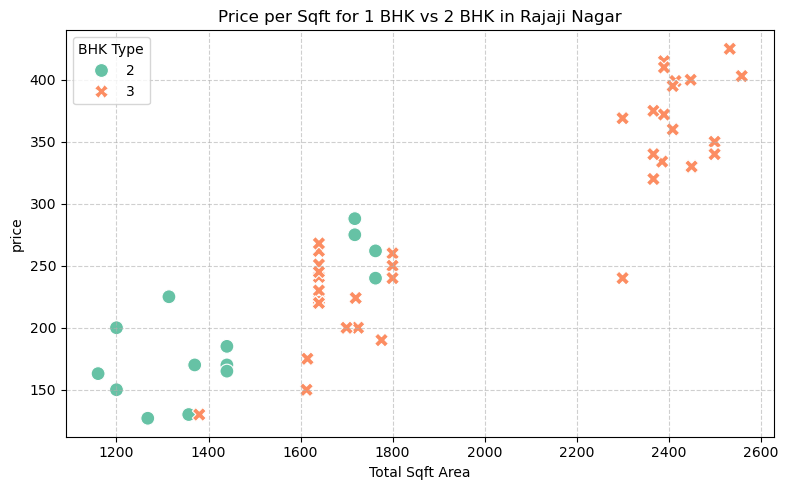

In [41]:
plot_bhk_price_comparison(df6,'Rajaji Nagar')

**in above diagram we undestand in some areas 2bhk price is greather then 3 bhk of same squarefit**

In [42]:
def remove_all_bhk_outliers(df):
    exclude_indices = np.array([])

    # Extract numeric BHK value (e.g., "3 BHK" → 3)
  
    for location, location_df in df.groupby('location'):
        bhk_stats = {}

        # Compute mean price_per_sqft for each BHK in the location
        for bhk, subdf in location_df.groupby('Bhk'):
            bhk_stats[bhk] = {
                'mean_price': subdf['price_per_sqr'].mean(),
                'indices': subdf.index
            }

        # Compare each higher BHK to the previous smaller BHK
        bhk_levels = sorted(bhk_stats.keys())
        for i in range(1, len(bhk_levels)):
            lower_bhk = bhk_levels[i - 1]
            higher_bhk = bhk_levels[i]
            
            lower_mean = bhk_stats[lower_bhk]['mean_price']
            higher_indices = bhk_stats[higher_bhk]['indices']

            # Mark higher BHK rows as outliers if price/sqft < smaller BHK mean
            bad_index = df.loc[higher_indices][df.loc[higher_indices, 'price_per_sqr'] < lower_mean].index
            exclude_indices = np.concatenate((exclude_indices, bad_index))

    print(f"Removed {len(exclude_indices)} outlier records across all BHKs.")
    
    # Drop those bad rows
    return df.drop(exclude_indices, axis='index')


**in above function we remove thoes outlier where  higher bhk value is less then lower bhk value is same area and same sqr fit**

In [43]:
df7=remove_all_bhk_outliers(df6)
df7.shape

Removed 4072 outlier records across all BHKs.


(6129, 7)

In [44]:
df6.shape

(10201, 7)

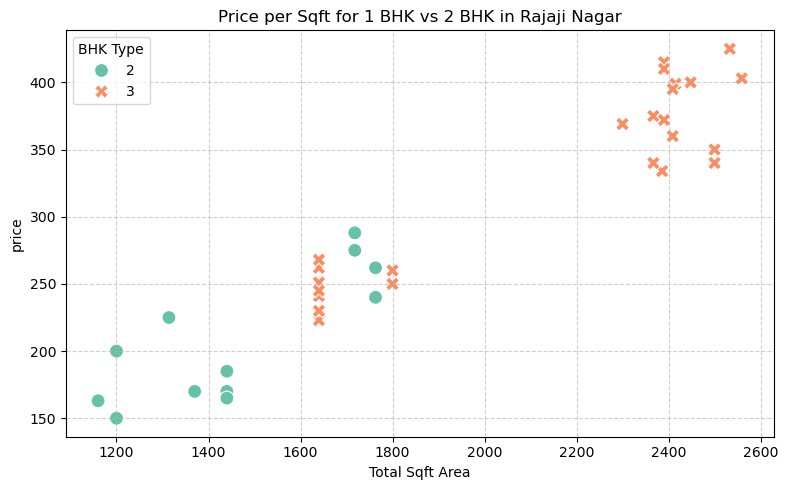

In [45]:
#check outlier remove or not 
plot_bhk_price_comparison(df7,'Rajaji Nagar')

Text(0, 0.5, 'count')

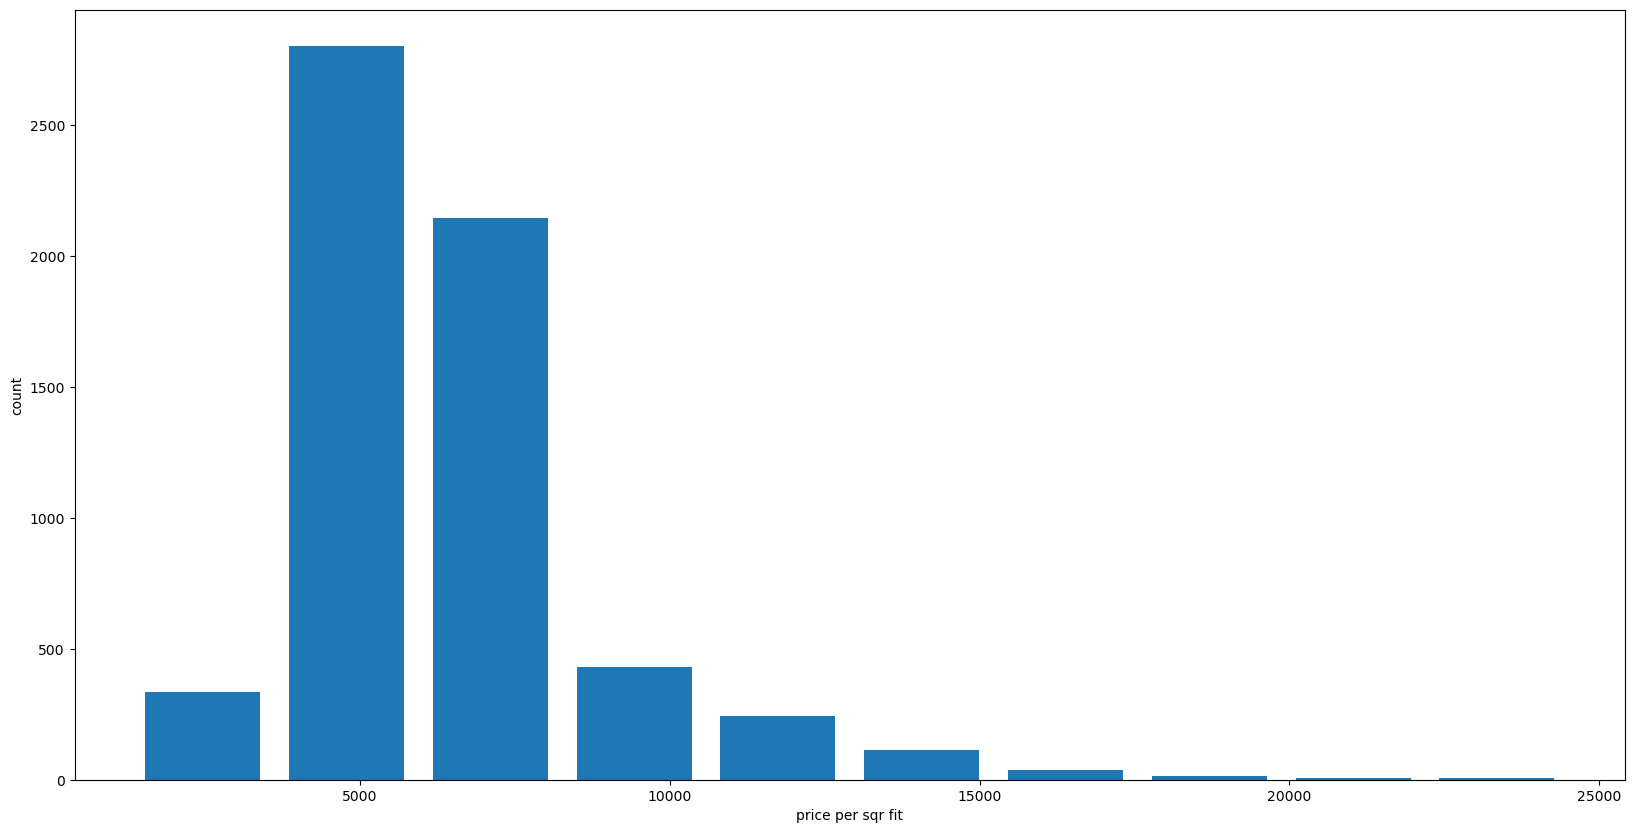

In [46]:
import matplotlib
matplotlib.rcParams["figure.figsize"]=(20,10)
plt.hist(df7.price_per_sqr,rwidth=0.8)
plt.xlabel('price per sqr fit')
plt.ylabel('count')

In [47]:
df7[df7.bath>df7.Bhk+2]

,location,size,total_sqft,bath,price,Bhk,price_per_sqr
5253,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
5860,Others,6 BHK,11338.0,9.0,1000.0,6,8819.897689
8969,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330


**here we see some outlier related to bathrooms here we see bathrooms no is huge as comparied to bhk we remove this data**

In [48]:
df7.shape

(6129, 7)

In [49]:
df8=df7[df7.bath<df7.Bhk+2]
df8.shape

(6057, 7)

In [50]:
#drop uwanted columns 
df9=df8.drop(['size','price_per_sqr'],axis='columns')
df9.head(3)

,location,total_sqft,bath,price,Bhk
0,Devarabeesana Halli,1672.0,3.0,150.0,3
1,Devarabeesana Halli,1750.0,3.0,149.0,3
2,Devarabeesana Halli,1750.0,3.0,150.0,3


In [51]:
df9.columns

Index(['location', 'total_sqft', 'bath', 'price', 'Bhk'], dtype='object')

In [52]:
#doing onehotencoder convert string column(location) in int
dummies=pd.get_dummies(df9['location'].astype(str),dtype=int)

In [53]:
df10=pd.concat([df9,dummies.drop('Others',axis='columns')],axis='columns')
df10.head(3)

,location,total_sqft,bath,price,Bhk,Devarabeesana Halli,Devarachikkanahalli,Electronic City,Mysore Highway,Rachenahalli,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,"Whitefield,",Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,Devarabeesana Halli,1672.0,3.0,150.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Devarabeesana Halli,1750.0,3.0,149.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Devarabeesana Halli,1750.0,3.0,150.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [54]:
df11=df10.drop('location',axis='columns')
df11.head(3)

,total_sqft,bath,price,Bhk,Devarabeesana Halli,Devarachikkanahalli,Electronic City,Mysore Highway,Rachenahalli,Thanisandra,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,"Whitefield,",Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1672.0,3.0,150.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1750.0,3.0,149.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1750.0,3.0,150.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [55]:
#split column in x and y
x=df11.drop('price',axis='columns')
x.head(3)

,total_sqft,bath,Bhk,Devarabeesana Halli,Devarachikkanahalli,Electronic City,Mysore Highway,Rachenahalli,Thanisandra,south,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,"Whitefield,",Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1672.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1750.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1750.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [56]:
y=df11['price']
y.head(3)


0    150.0
1    149.0
2    150.0
Name: price, dtype: float64

In [57]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [58]:
from sklearn.linear_model import LinearRegression
lr_clf=LinearRegression()


In [59]:
lr_clf.fit(x_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [60]:
lr_clf.score(x_test,y_test)

0.8468274396308201

In [61]:
#now using cross val score for model validation
from sklearn.model_selection import ShuffleSplit,cross_val_score
from sklearn.linear_model import LinearRegression

In [62]:
cv=ShuffleSplit( n_splits=10,test_size=0.2,random_state=42)
#its randomly shuffles dataset before splitting 
cross_val_score(LinearRegression(),x,y,cv=cv)

array([0.84682744, 0.79622136, 0.87513203, 0.78195138, 0.86626837,
       0.81027867, 0.85960904, 0.84998744, 0.84588748, 0.80988841])

**now we using gridsearchcv we check best model in lasso,linner and decisiontreealogorithm**

In [63]:
from sklearn.model_selection import GridSearchCV, ShuffleSplit
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model(x,y):
    # Cross-validation strategy
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
    
    # Models & their parameter grids
    models = {
        'LinearRegression': {
            'model': LinearRegression(),
            'params': {
                'fit_intercept': [True, False],
                'positive': [True, False]
            }
        },
        'Lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [0.001, 0.01, 0.1, 1, 10],
                'selection': ['cyclic', 'random']
            }
        },
        'DecisionTree': {
            'model': DecisionTreeRegressor(random_state=42),
            'params': {
                'criterion': ['squared_error', 'friedman_mse'],
                'splitter': ['best', 'random'],
                'max_depth': [None, 5, 10, 15, 20]
            }
        }
    }
    
    # Store results
    scores = []
    
    for name, mp in models.items():
        print(f"\n🔹 Running GridSearch for {name}...")
        gs = GridSearchCV(
            mp['model'],
            mp['params'],
            cv=cv,
            scoring='r2',
            return_train_score=False
        )
        gs.fit(x, y)
        
        scores.append({
            'Model': name,
            'Best_Score': gs.best_score_,
            'Best_Params': gs.best_params_
        })
    
    # Convert results to DataFrame for easy comparison
    
    result_df = pd.DataFrame(scores, columns=['Model', 'Best_Score', 'Best_Params'])
    print("\n✅ Model Comparison:\n", result_df)
    
    # Return best model info
    best_model = result_df.iloc[result_df['Best_Score'].idxmax()]
    print(f"\n🏆 Best Model: {best_model['Model']}")
    print(f"Best Parameters: {best_model['Best_Params']}")
    print(f"Best R² Score: {best_model['Best_Score']:.4f}")
    
    return result_df


In [64]:
find_best_model(x,y)


🔹 Running GridSearch for LinearRegression...

🔹 Running GridSearch for Lasso...

🔹 Running GridSearch for DecisionTree...

✅ Model Comparison:
               Model  Best_Score  \
0  LinearRegression    0.834885   
1             Lasso    0.833221   
2      DecisionTree    0.727251   

                                         Best_Params  
0        {'fit_intercept': False, 'positive': False}  
1            {'alpha': 0.001, 'selection': 'random'}  
2  {'criterion': 'squared_error', 'max_depth': 20...  

🏆 Best Model: LinearRegression
Best Parameters: {'fit_intercept': False, 'positive': False}
Best R² Score: 0.8349


,Model,Best_Score,Best_Params
0,LinearRegression,0.834885,"{'fit_intercept': False, 'positive': False}"
1,Lasso,0.833221,"{'alpha': 0.001, 'selection': 'random'}"
2,DecisionTree,0.727251,"{'criterion': 'squared_error', 'max_depth': 20..."


**as per above test LinnerRegression is best model for predication**

In [65]:
x.columns

Index(['total_sqft', 'bath', 'Bhk', ' Devarabeesana Halli',
       ' Devarachikkanahalli', ' Electronic City', ' Mysore Highway',
       ' Rachenahalli', ' Thanisandra', ' south',
       ...
       'Vishveshwarya Layout', 'Vishwapriya Layout', 'Vittasandra',
       'Whitefield', 'Whitefield, ', 'Yelachenahalli', 'Yelahanka',
       'Yelahanka New Town', 'Yelenahalli', 'Yeshwanthpur'],
      dtype='object', length=262)

In [66]:
def predict_price(location, sqft, bath, bhk, lr_clf, x_columns):
 
    # Step 1: create zero-filled array same size as training columns
    x = np.zeros(len(x_columns))

    # Step 2: set numerical features (make sure column names match your training data)
    x[x_columns.get_loc('total_sqft')] = sqft
    x[x_columns.get_loc('bath')] = bath
    x[x_columns.get_loc('Bhk')] = bhk

    # Step 3: set one-hot encoded location column
    location_col = f"location_{location}"
    if location_col in x_columns:
        x[x_columns.get_loc(location_col)] = 1

    # Step 4: make prediction
    return round(lr_clf.predict([x])[0], 2)


In [67]:
x_columns = x.columns

In [77]:
pred = predict_price('1st Phase JP Nagar', 1500, 2, 3, lr_clf, x_columns)
print("Predicted Price (Lakh):", pred)

Predicted Price (Lakh): 120.75


C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [69]:
df[df['location'] == 'Whitefield'].shape

(540, 9)

In [70]:
for i in range(5):
    row = df10.sample(1).iloc[0]
    pred = predict_price(row.location, row.total_sqft, row.bath, row.Bhk, lr_clf, x.columns)
    print(f"Actual: {row.price}, Predicted: {pred}, Location: {row.location}")


Actual: 110.0, Predicted: 104.98, Location: Koramangala
Actual: 54.0, Predicted: 86.96, Location: Hebbal
Actual: 71.0, Predicted: 100.44, Location: Dodda Nekkundi
Actual: 280.0, Predicted: 322.78, Location: Sarjapur  Road
Actual: 52.81, Predicted: 114.31, Location: Bommasandra


C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [80]:
import pickle
import os
with open('house price prediction.pickle','wb')as f:
    pickle.dump(lr_clf,f)
print(os.getcwd())    

C:\Users\Admin


In [82]:
import json
columns={
    'data_columns':[col.lower() for col in x.columns]
}
with open('columns.json','w')as f:
    f.write(json.dumps(columns))
print(os.getcwd())    

C:\Users\Admin
